In [ ]:
import scipy.io
import pandas as pd
import os
import random

import numpy as np
import pickle
import torch
import matplotlib.pyplot as plt

In [ ]:
SUBJECTS_FOLDER = '/content/drive/MyDrive/Social memory cuing full dataset/derivatives/EEGPreprocessedDataTableStudy'
SUBJECTS = [ name for name in os.listdir(SUBJECTS_FOLDER) if os.path.isdir(os.path.join(SUBJECTS_FOLDER, name)) ]
SUBJECTS.sort()
print(SUBJECTS)
matrices_path = "/content/drive/MyDrive/Tesi/Classification+GL/HyperParamsTuning_GCN_GL_NewNorm/"

['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-06', 'sub-07', 'sub-09', 'sub-10', 'sub-11', 'sub-12', 'sub-13', 'sub-14', 'sub-15', 'sub-16', 'sub-17', 'sub-18', 'sub-19', 'sub-20', 'sub-21', 'sub-22', 'sub-23', 'sub-24', 'sub-25', 'sub-26', 'sub-27', 'sub-28', 'sub-29', 'sub-30', 'sub-31', 'sub-32', 'sub-33', 'sub-34', 'sub-35', 'sub-36', 'sub-37', 'sub-38', 'sub-39', 'sub-40', 'sub-41', 'sub-43', 'sub-44', 'sub-45', 'sub-46', 'sub-48', 'sub-49', 'sub-50']


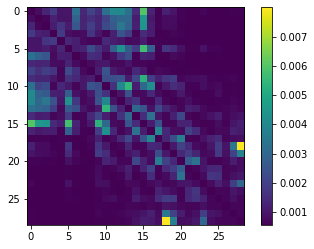

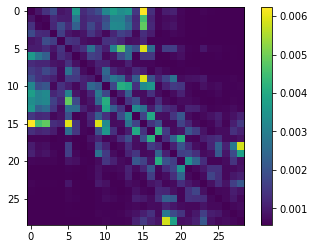

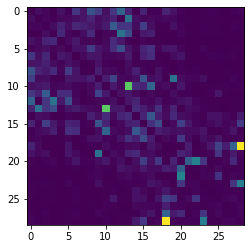

In [ ]:
sum_soc = torch.zeros((29,29))
sum_non_soc = torch.zeros((29,29))
count = 0

sweep_list = [8,"6*",3,5,8,0,1,4,1,6,3,9,"8*","6*",7,2,"/",4,"/","8*",9,9,7,9,\
              "5*",0,2,"/",0,"1*",1,9,3,11,"4*",8,9,0,4,1,3,7,5,19]

sweep_list = [str(x) for x in sweep_list]
folders = os.listdir(matrices_path)
folders.sort()

for i, fold in enumerate(folders):
  try:
    path_soc = matrices_path + fold + "/sweep0/" + sweep_list[i] + "/learned_soc.pt"
    path_non_soc = matrices_path + fold + "/sweep0/" + sweep_list[i] + "/learned_non_soc.pt"
    
    soc = torch.load(path_soc)
    sum_soc = sum_soc + soc
    non_soc = torch.load(path_non_soc)
    sum_non_soc = sum_non_soc + non_soc
    count += 1
  except:
    pass

avg_soc = sum_soc/torch.tensor(count)
avg_non_soc = sum_non_soc/torch.tensor(count)

plt.imshow(avg_soc)
plt.colorbar()
plt.show()



plt.imshow(avg_non_soc)
plt.colorbar()
plt.show()


plt.imshow(torch.abs(avg_soc - avg_non_soc))
plt.show()


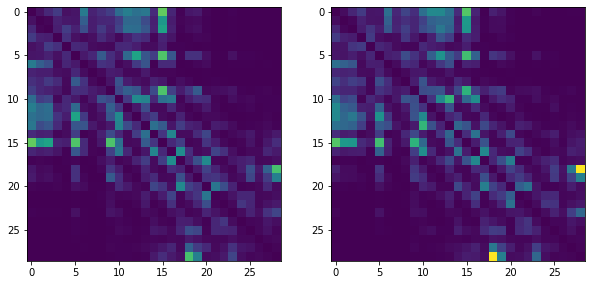

In [ ]:
minmin = np.min([np.min(avg_soc), np.min(avg_non_soc)])
maxmax = np.max([np.max(avg_non_soc), np.max(avg_soc)])
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(10, 5)

im1 = axes[0].imshow(avg_non_soc, vmin = minmin, vmax = maxmax, aspect='equal')
im2 = axes[1].imshow(avg_soc, vmin = minmin, vmax = maxmax, aspect='equal')

plt.show()

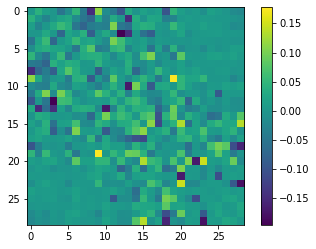

In [ ]:
diff = (avg_non_soc - avg_soc) / (avg_non_soc + avg_soc)
plt.imshow(diff)
plt.colorbar()
plt.show()

In [ ]:
accs = ["", "76,5", "61,7", "82,3", "70,5", "76,5", "79,4", "76,5",\
        "100,0", "82,3", "73,5", "88,2", "61,7", "76,5", "91,1", "67,6", "82,3",\
        "76,5", "73,5", "73,5", "70,5", "76,5", "79,4", "73,5", "85,3", "97,0",\
        "", "85,3", "79,4", "64,7", "82,3", "94,1", "73,5", "70,5", "79,4",\
        "79,4", "", "85,3", "82,3", "70,5", "85,3", "100,0", "", ""]

In [ ]:
sweep_list = []

tensor([1.2495, 1.1305, 1.0894, 1.1920, 1.0885, 1.0354, 1.2003, 0.9810, 1.0330,
        0.9793, 1.0762, 1.0524, 1.0220, 1.0313, 0.9483, 1.1303, 0.9917, 0.9037,
        0.9024, 0.9381, 0.9053, 0.8808, 0.8827, 0.8723, 0.8925, 0.8881, 0.8796,
        0.9142, 0.9094], dtype=torch.float64)
tensor([0.9999, 0.9999, 0.9999, 0.9999, 1.0000, 1.0001, 0.9999, 1.0000, 0.9999,
        1.0000, 1.0000, 1.0003, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 1.0000,
        1.0005, 1.0001, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 1.0002, 1.0001,
        1.0005, 0.9999], dtype=torch.float64)
tensor([0.7999, 0.8112, 0.8768, 0.9236, 0.7756, 1.2132, 1.1459, 0.7019, 0.7423,
        1.1877, 1.2972, 1.2654, 0.8460, 1.3107, 1.3230, 1.1538, 1.3999, 1.1022,
        1.0498, 1.2232, 1.5682, 0.7383, 0.7796, 0.6658, 0.8695, 1.0931, 0.6335,
        0.7133, 0.7896], dtype=torch.float64)
tensor([0.8207, 0.8315, 0.8123, 0.8162, 0.9107, 1.2805, 0.8844, 0.8924, 1.1120,
        1.3034, 1.1898, 1.0310, 1.1464, 1.3939, 1.2275, 1.0852

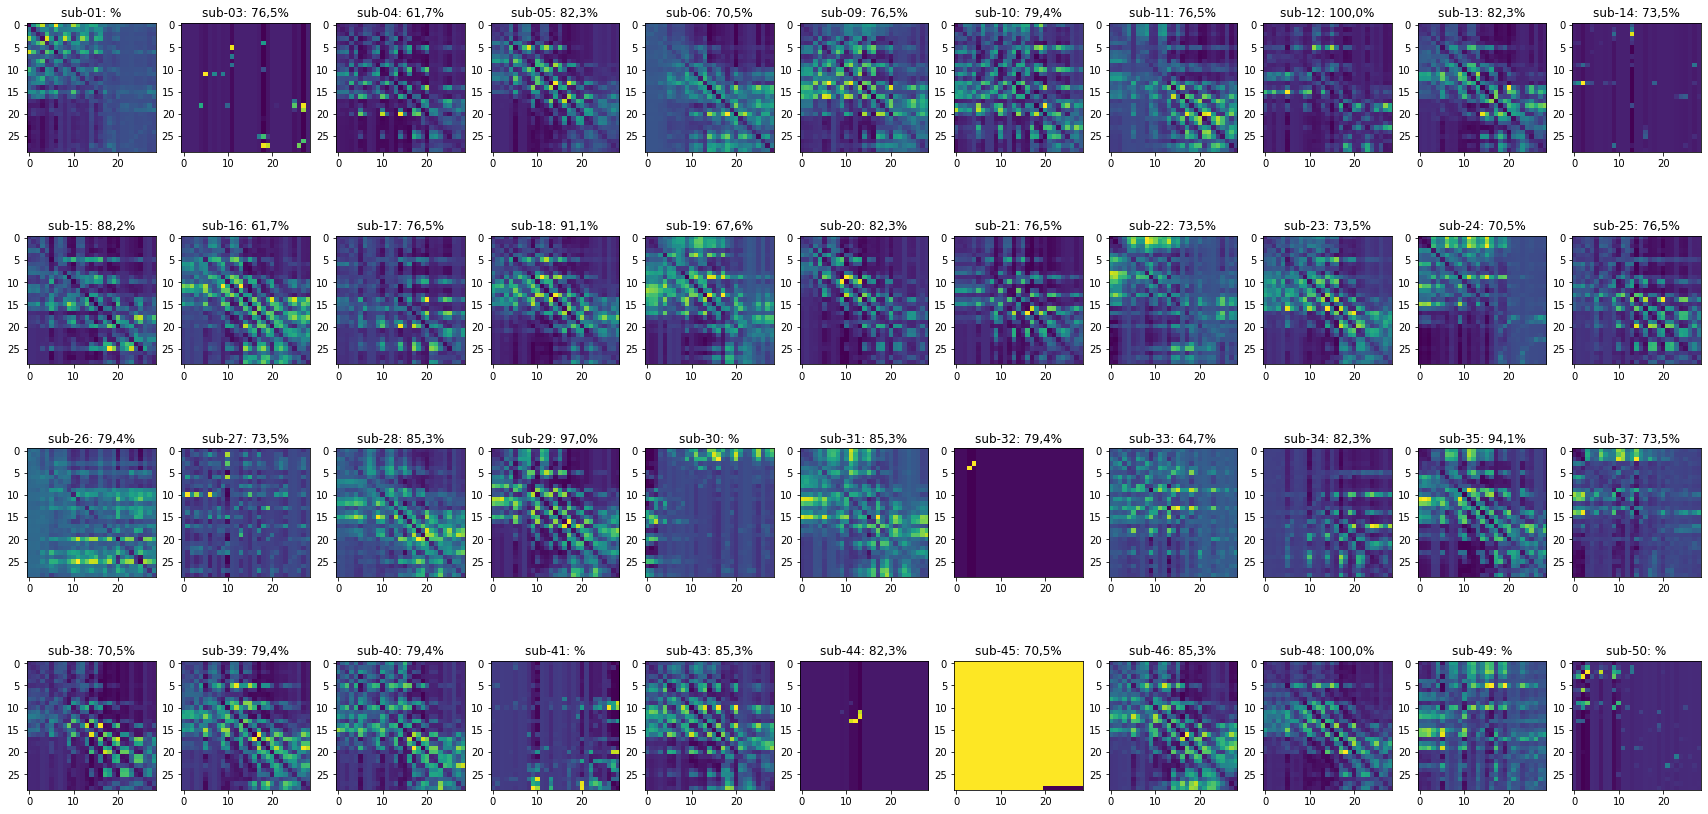

In [ ]:
cond = "soc"

fig = plt.figure(figsize=(30, 15))
columns = 11
rows = 4
avgs = []
sums = []
var = []
exception_count = 0

folders = os.listdir(matrices_path)
folders.sort()

for i, fold in enumerate(folders):
  try:
    path_soc = matrices_path + sub + "/1.0.0/" + sweep_list[i] + "/learned_" + cond + ".pt"
    soc = torch.load(path_soc)
    avgs.append(torch.mean(soc))
    sums.append(torch.sum(soc))
    var.append(torch.var(soc))
    print(torch.sum(soc, dim = 1))
    fig.add_subplot(rows, columns, i+1-exception_count)
    plt.title(sub + ": " + accs[i-exception_count] + "%")
    plt.imshow(soc)
  except:
    exception_count += 1
    pass

plt.show()

[tensor(4.0257e-05, dtype=torch.float64), tensor(4.5338e-10, dtype=torch.float64), tensor(0.0005, dtype=torch.float64), tensor(0.0003, dtype=torch.float64), tensor(4.1843e-05, dtype=torch.float64), tensor(0.0001, dtype=torch.float64), tensor(0.0002, dtype=torch.float64), tensor(4.6980e-05, dtype=torch.float64), tensor(0.0003, dtype=torch.float64), tensor(0.0004, dtype=torch.float64), tensor(3.6612e-10, dtype=torch.float64), tensor(0.0004, dtype=torch.float64), tensor(0.0001, dtype=torch.float64), tensor(0.0001, dtype=torch.float64), tensor(0.0004, dtype=torch.float64), tensor(7.8668e-05, dtype=torch.float64), tensor(0.0001, dtype=torch.float64), tensor(0.0004, dtype=torch.float64), tensor(4.2156e-06, dtype=torch.float64), tensor(0.0001, dtype=torch.float64), tensor(0.0001, dtype=torch.float64), tensor(0.0002, dtype=torch.float64), tensor(2.1360e-05, dtype=torch.float64), tensor(1.3303e-08, dtype=torch.float64), tensor(4.4609e-05, dtype=torch.float64), tensor(0.0003, dtype=torch.float64

<BarContainer object of 44 artists>

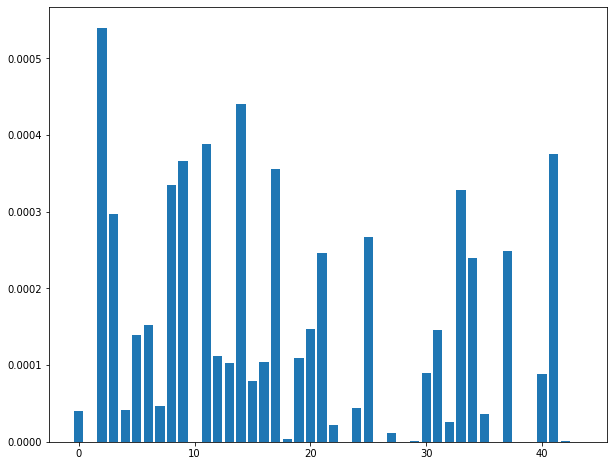

In [ ]:
print(var)

plt.figure(figsize=[10,8])
plt.bar(range(44), var, label='variance')

In [ ]:
print(sums)

[tensor(29.0000, dtype=torch.float64), tensor(29., dtype=torch.float64), tensor(29., dtype=torch.float64), tensor(29., dtype=torch.float64), tensor(29., dtype=torch.float64), tensor(29., dtype=torch.float64), tensor(29., dtype=torch.float64), tensor(29., dtype=torch.float64), tensor(29.0000, dtype=torch.float64), tensor(29., dtype=torch.float64), tensor(29.0000, dtype=torch.float64), tensor(29., dtype=torch.float64), tensor(29., dtype=torch.float64), tensor(29., dtype=torch.float64), tensor(29., dtype=torch.float64), tensor(29., dtype=torch.float64), tensor(29., dtype=torch.float64), tensor(29., dtype=torch.float64), tensor(29.0000, dtype=torch.float64), tensor(29., dtype=torch.float64), tensor(29., dtype=torch.float64), tensor(29., dtype=torch.float64), tensor(29., dtype=torch.float64), tensor(29., dtype=torch.float64), tensor(29.0000, dtype=torch.float64), tensor(29., dtype=torch.float64), tensor(29.0000, dtype=torch.float64), tensor(29., dtype=torch.float64), tensor(29.0000, dtype=t

In [ ]:
print(avgs)

[tensor(0.0345, dtype=torch.float64), tensor(0.0345, dtype=torch.float64), tensor(0.0345, dtype=torch.float64), tensor(0.0345, dtype=torch.float64), tensor(0.0345, dtype=torch.float64), tensor(0.0345, dtype=torch.float64), tensor(0.0345, dtype=torch.float64), tensor(0.0345, dtype=torch.float64), tensor(0.0345, dtype=torch.float64), tensor(0.0345, dtype=torch.float64), tensor(0.0345, dtype=torch.float64), tensor(0.0345, dtype=torch.float64), tensor(0.0345, dtype=torch.float64), tensor(0.0345, dtype=torch.float64), tensor(0.0345, dtype=torch.float64), tensor(0.0345, dtype=torch.float64), tensor(0.0345, dtype=torch.float64), tensor(0.0345, dtype=torch.float64), tensor(0.0345, dtype=torch.float64), tensor(0.0345, dtype=torch.float64), tensor(0.0345, dtype=torch.float64), tensor(0.0345, dtype=torch.float64), tensor(0.0345, dtype=torch.float64), tensor(0.0345, dtype=torch.float64), tensor(0.0345, dtype=torch.float64), tensor(0.0345, dtype=torch.float64), tensor(0.0345, dtype=torch.float64), 

In [ ]:
sweep_list = [8,"6*",3,5,8,0,1,4,1,6,3,9,"8*","6*",7,2,"/",4,"/","8*",9,9,7,9,\
              "5*",0,2,"/",0,"1*",1,9,3,11,"4*",8,9,0,4,1,3,7,5,19]

sweep_list = [str(x) for x in sweep_list]

gcn_accs = [64.7,67.6,67.6,79.4,79.4,88.2,91.1,82.3,82.3,85.3,88.2,88.2,67.6,\
            70.5,79.4,67.6,"",64.7,"",79.4,73.5,76.5,79.4,76.5,88.20,91.1,64.7,\
            "",79.4,67.6,79.4,91.1,73.5,70.5,79.4,70.5,64.7,85.3,91.1,70.5,85.3,\
            100.0,79.4,70.5]

#print(np.mean(gcn_accs))

gcn_accs = [str(x) for x in gcn_accs]

print(len(gcn_accs))
print(len(sweep_list))

44
44


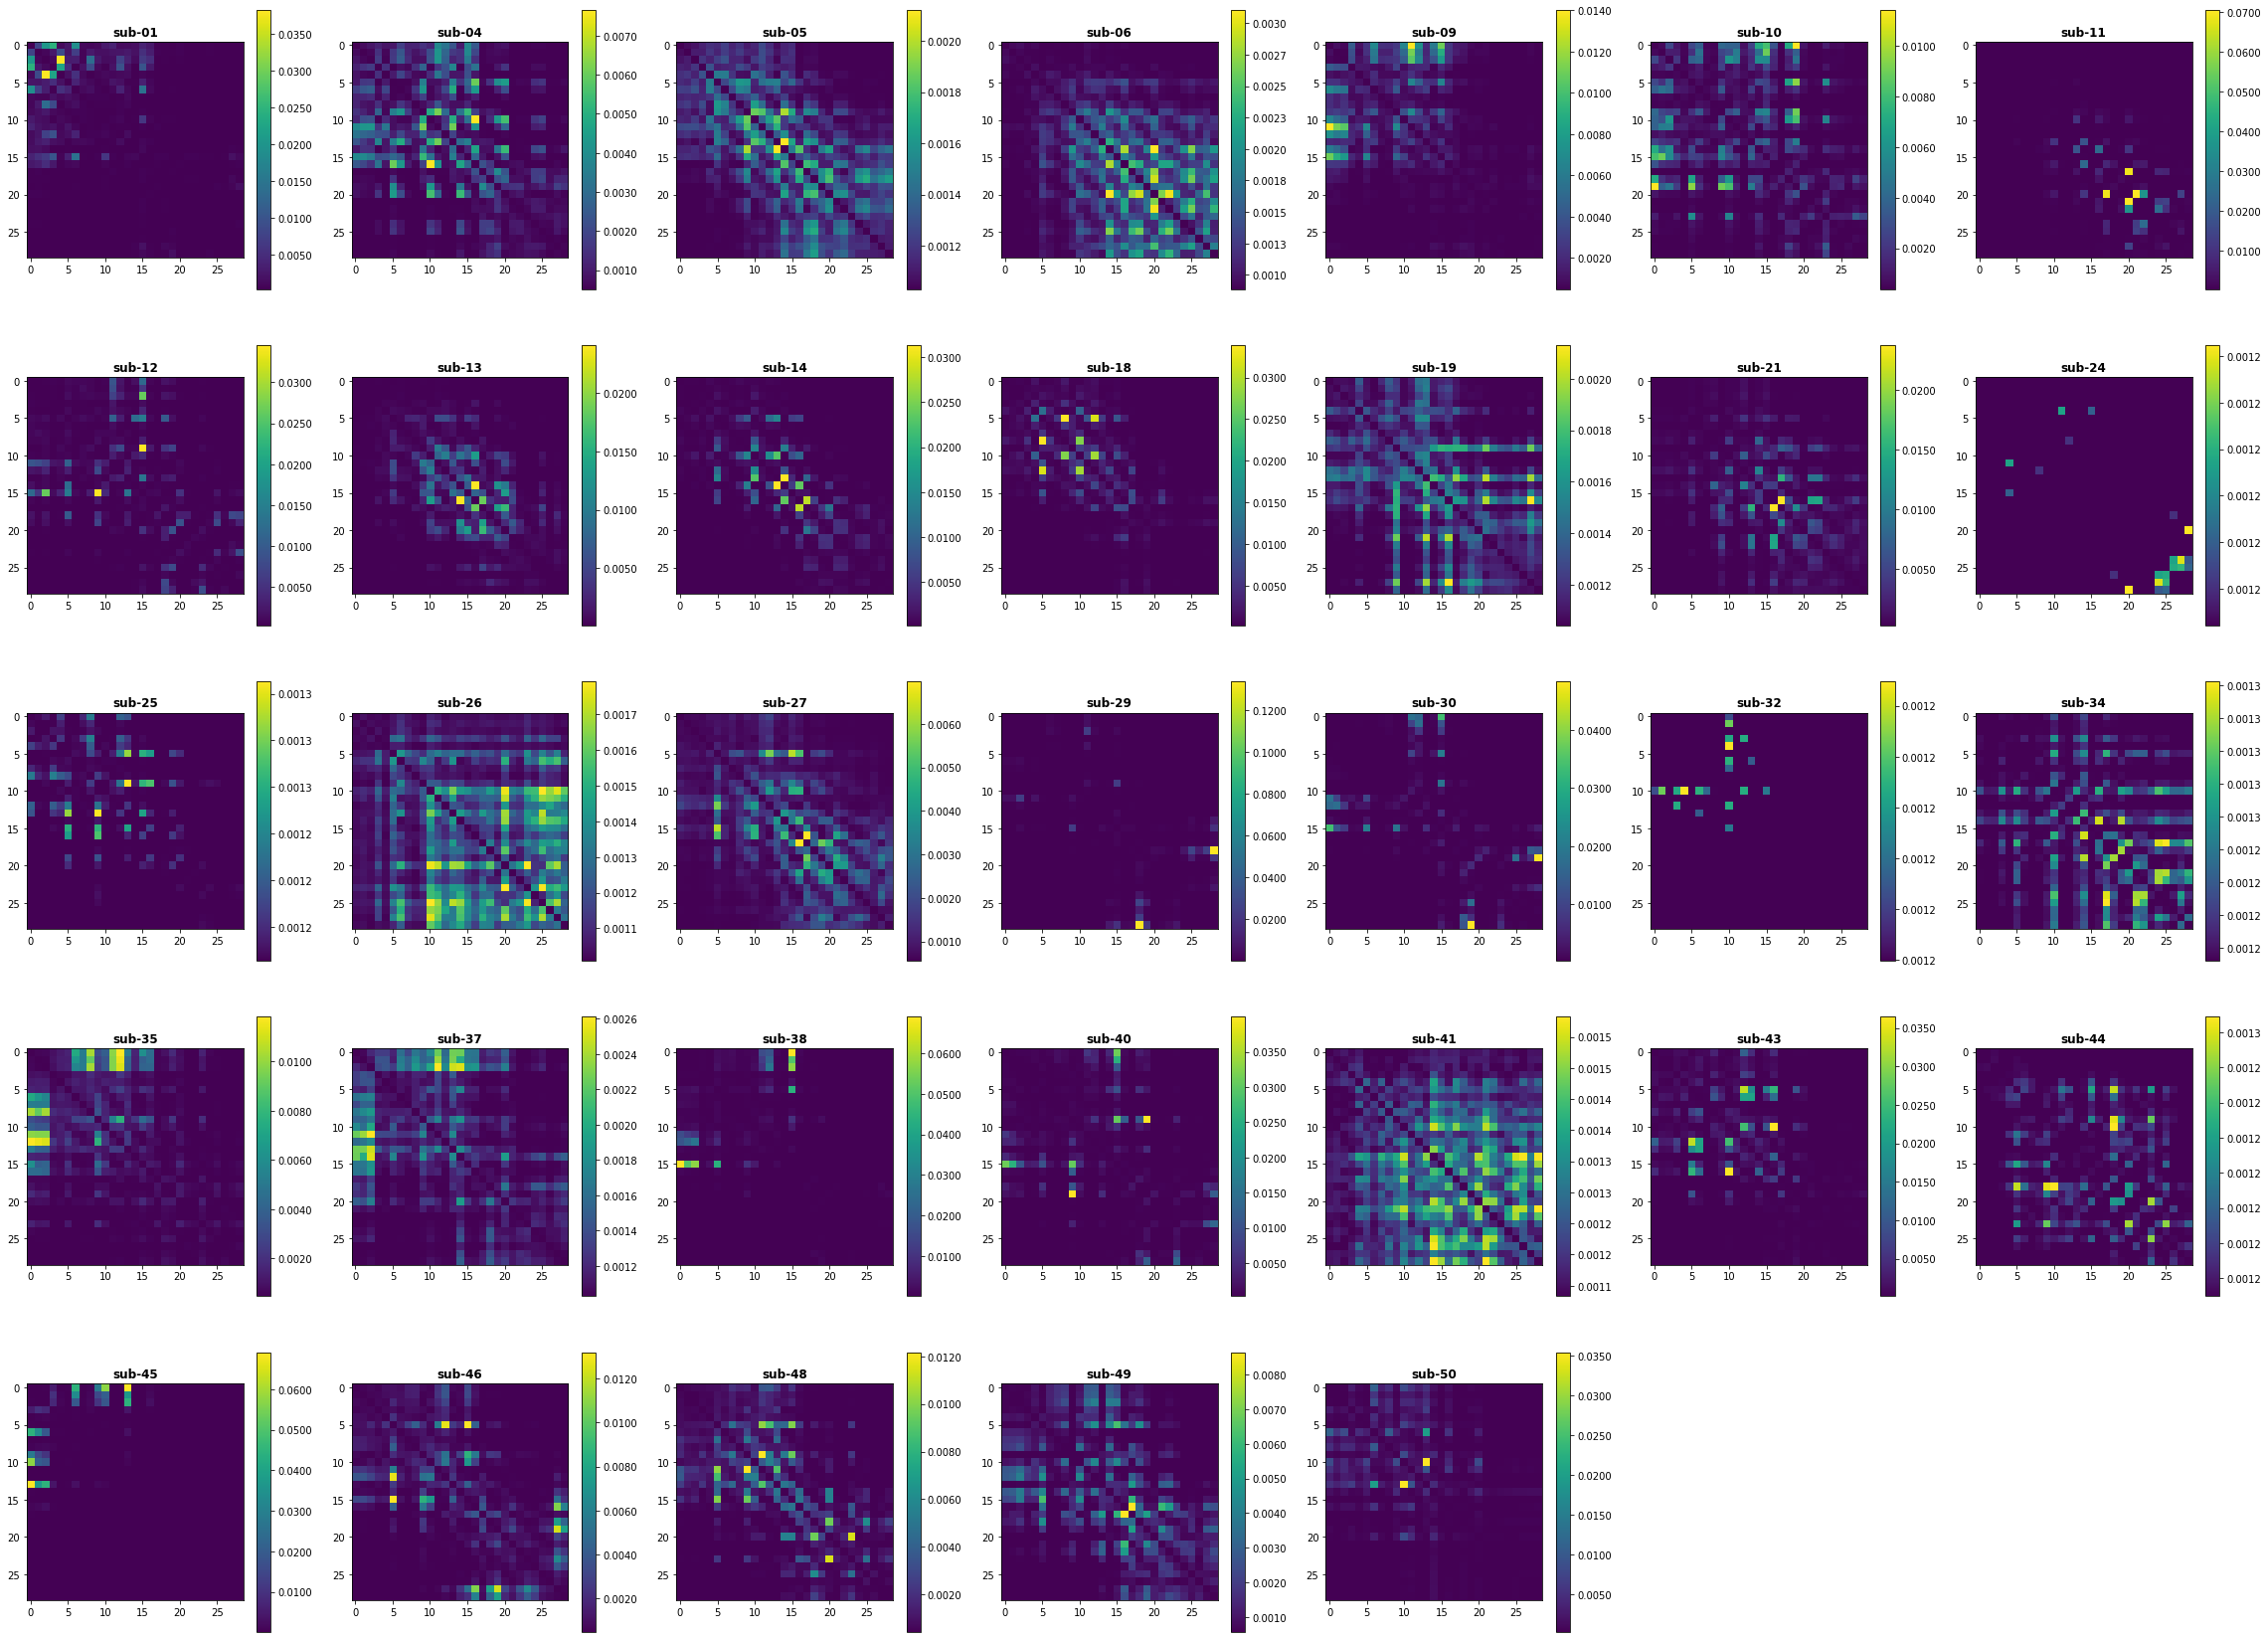

In [ ]:
cond = "non_soc"

fig = plt.figure(figsize=(40, 30))
columns = 7
rows = 5

exception_count = 0
folders = os.listdir(matrices_path)
folders.sort()

for i, fold in enumerate(folders):
  try:
    path = matrices_path + fold + "/sweep0/" + sweep_list[i] + "/learned_" + cond + ".pt"
    mat = torch.load(path)
    
    fig.add_subplot(rows, columns, i+1-exception_count)
    plt.title(fold, fontweight="bold")
    plt.imshow(mat)
    plt.colorbar(format = "%.4f")
  except:
    exception_count += 1

plt.show()

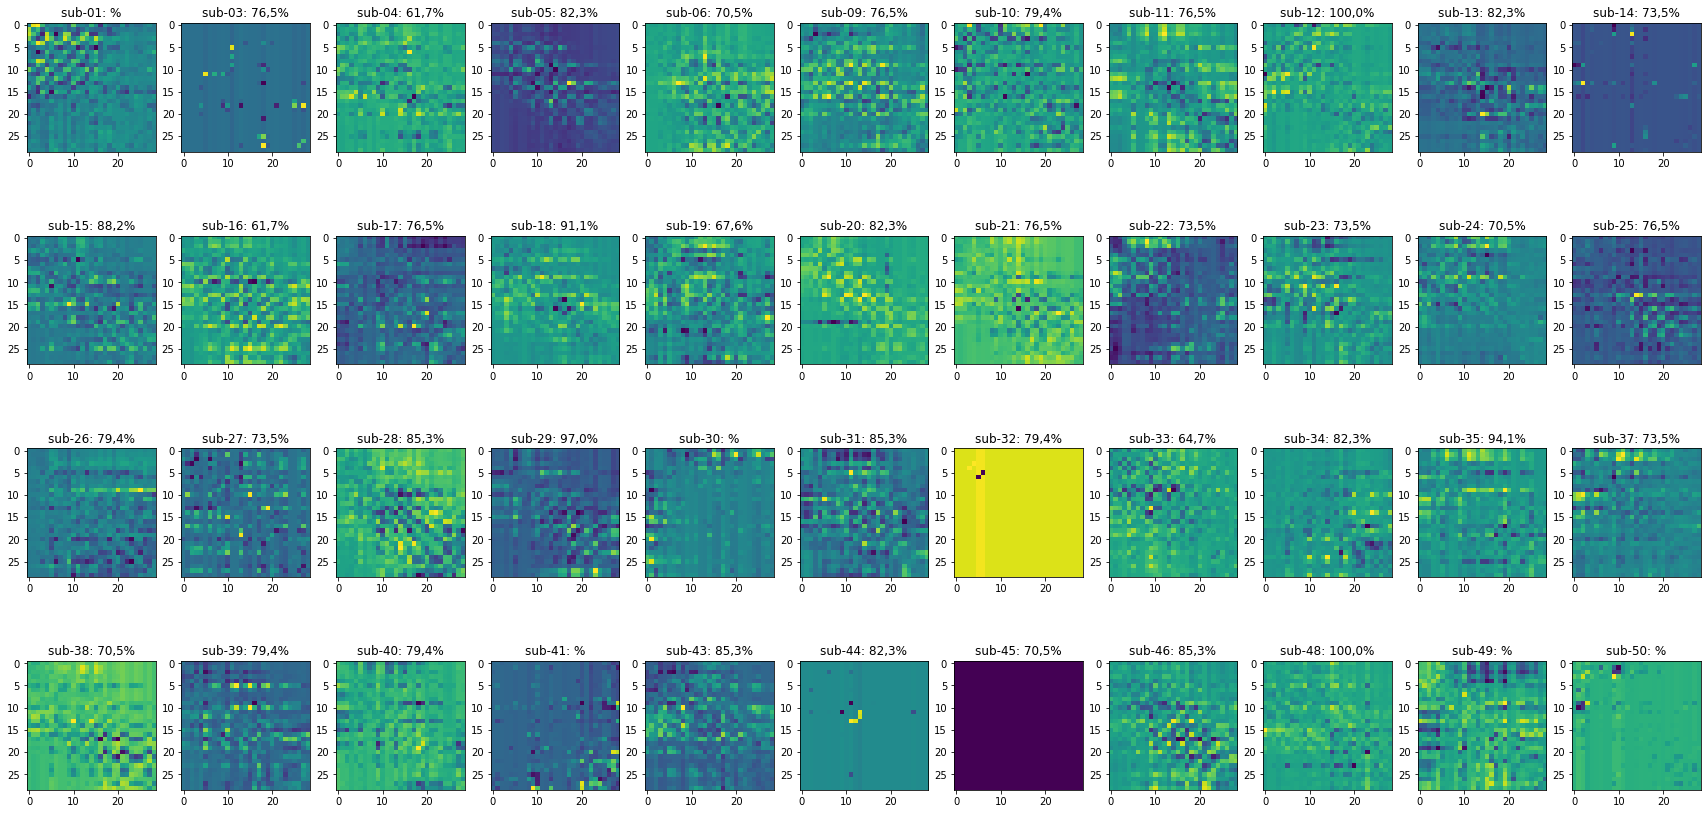

In [ ]:
fig = plt.figure(figsize=(30, 15))
columns = 11
rows = 4

exception_count = 0

for i, sub in enumerate(SUBJECTS):
  try:
    path_soc = matrices_path + sub + "/1.0.0/learned_soc" + ".pt"
    path_non_soc = matrices_path + sub + "/1.0.0/learned_non_soc" + ".pt"
    
    soc = torch.load(path_soc)
    non_soc = torch.load(path_non_soc)
    fig.add_subplot(rows, columns, i+1-exception_count)

    plt.title(sub + ": " + accs[i-exception_count] + "%")
    plt.imshow(soc-non_soc)
  except:
    exception_count += 1
    pass

plt.show()

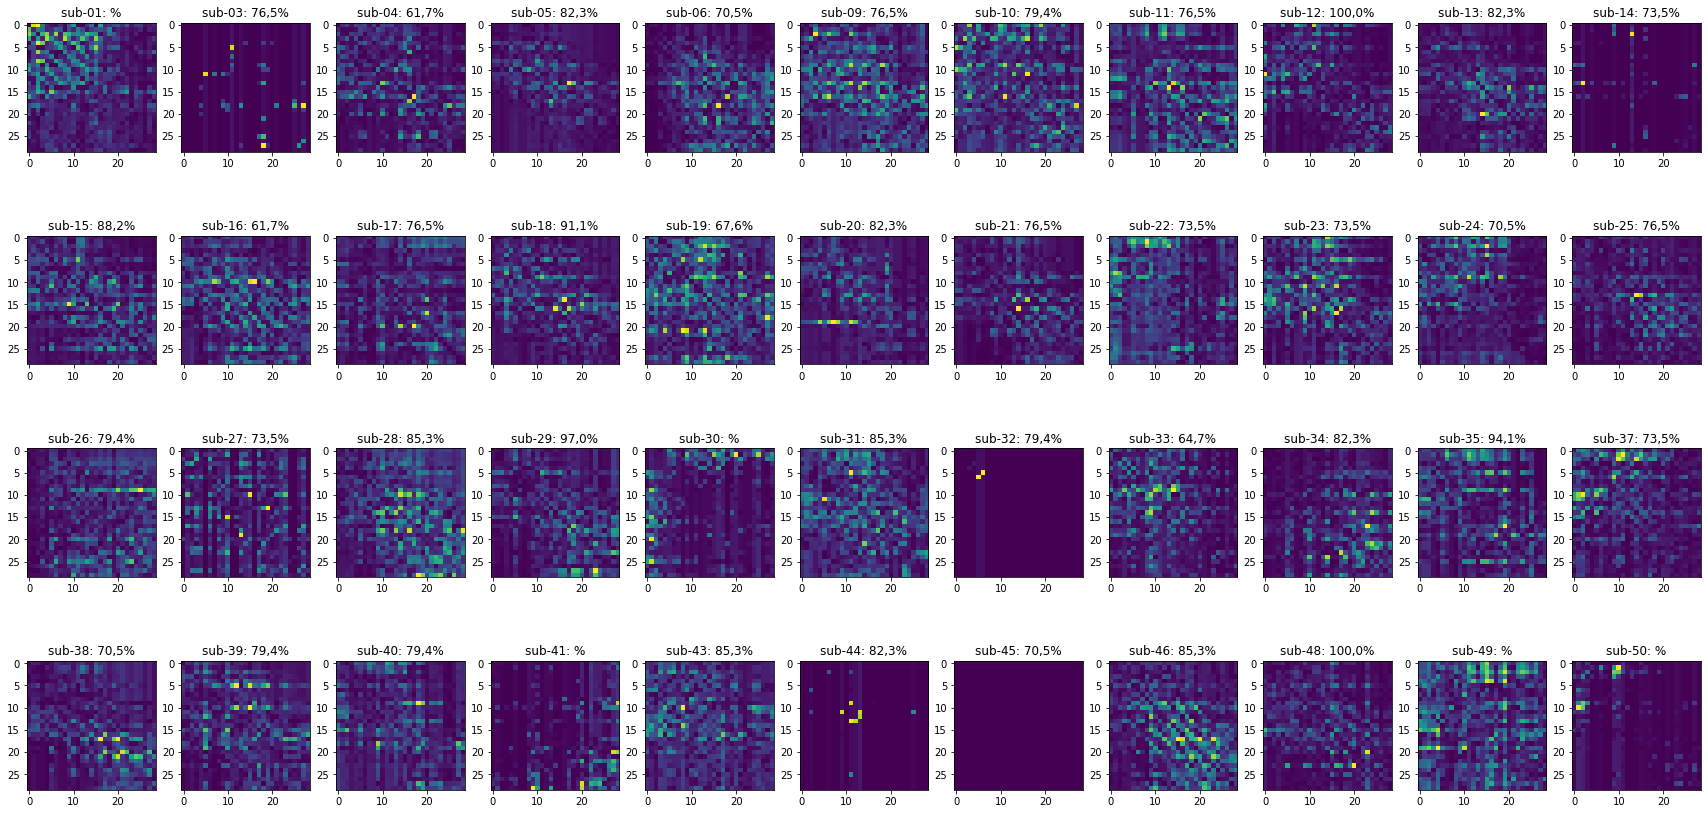

In [ ]:
fig = plt.figure(figsize=(30, 15))
columns = 11
rows = 4

exception_count = 0

for i, sub in enumerate(SUBJECTS):
  try:
    path_soc = matrices_path + sub + "/1.0.0/learned_soc" + ".pt"
    path_non_soc = matrices_path + sub + "/1.0.0/learned_non_soc" + ".pt"
    
    soc = torch.load(path_soc)
    non_soc = torch.load(path_non_soc)
    fig.add_subplot(rows, columns, i+1-exception_count)

    plt.title(sub + ": " + accs[i-exception_count] + "%")
    plt.imshow(np.abs(soc-non_soc))
  except:
    exception_count += 1
    pass

plt.show()

In [ ]:
path_soc = matrices_path + "sub-46/1.0.0/learned_soc" + ".pt"
soc = np.array(torch.load(path_soc))
channels_list = ['Fp1','Fpz','Fp2',
    'AF3','AF4',
    'F7','F3','Fz','F4','F8',
    'FC5','FC1','FC2','FC6',
    'C3','Cz','C4',
    'CP5','CP1','CP2','CP6',
    'P5','P3','Pz','P4','P6',
    'POz','O1','O2']

lbls = dict(zip(range(29), channels_list))
print(lbls)

lbls_2= dict(zip(channels_list, range(29)))
print(lbls_2)

{0: 'Fp1', 1: 'Fpz', 2: 'Fp2', 3: 'AF3', 4: 'AF4', 5: 'F7', 6: 'F3', 7: 'Fz', 8: 'F4', 9: 'F8', 10: 'FC5', 11: 'FC1', 12: 'FC2', 13: 'FC6', 14: 'C3', 15: 'Cz', 16: 'C4', 17: 'CP5', 18: 'CP1', 19: 'CP2', 20: 'CP6', 21: 'P5', 22: 'P3', 23: 'Pz', 24: 'P4', 25: 'P6', 26: 'POz', 27: 'O1', 28: 'O2'}
{'Fp1': 0, 'Fpz': 1, 'Fp2': 2, 'AF3': 3, 'AF4': 4, 'F7': 5, 'F3': 6, 'Fz': 7, 'F4': 8, 'F8': 9, 'FC5': 10, 'FC1': 11, 'FC2': 12, 'FC6': 13, 'C3': 14, 'Cz': 15, 'C4': 16, 'CP5': 17, 'CP1': 18, 'CP2': 19, 'CP6': 20, 'P5': 21, 'P3': 22, 'Pz': 23, 'P4': 24, 'P6': 25, 'POz': 26, 'O1': 27, 'O2': 28}


In [ ]:
eeg_pos = [['Fpz','Fp2','F8', 'O2', 'POz', 'O1', 'F7', 'Fp1'], ['AF4', 'FC6', 'CP6', 'P6', 'P5', 'CP5','FC5', 'AF3'], \
           ['Fz', 'F4', 'C4', 'P4', 'Pz', 'P3', 'C3','F3'], ['FC2', 'CP2', 'CP1', 'FC1'], ['Cz']]

eeg_pos_num = []
for circ in eeg_pos:
  curr = []
  for elec in circ:
    curr.append(lbls_2[elec])
  curr.reverse()
  eeg_pos_num.append(curr)


eeg_pos_num.reverse()
print(eeg_pos_num)

[[15], [11, 18, 19, 12], [6, 14, 22, 23, 24, 16, 8, 7], [3, 10, 17, 21, 25, 20, 13, 4], [0, 5, 27, 26, 28, 9, 2, 1]]


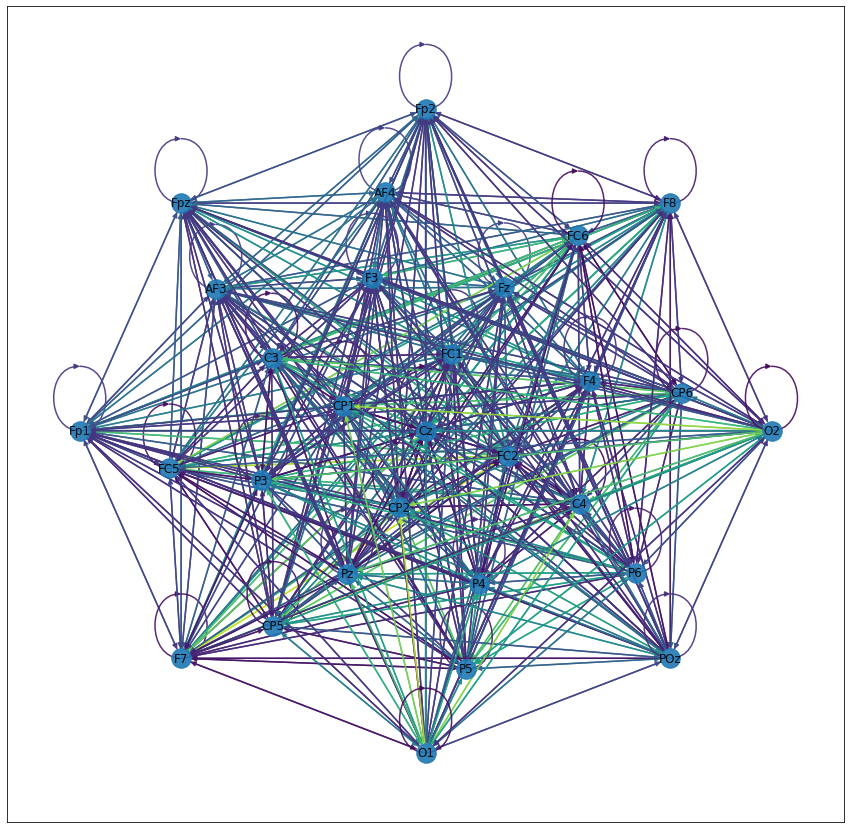

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
fig = plt.figure(figsize=(15, 15))
G = nx.from_numpy_matrix(np.matrix(soc), create_using=nx.DiGraph)
nx.draw_networkx(G,  nx.shell_layout(G, eeg_pos_num), labels = lbls, edge_color = soc.flatten(), cmap = plt.cm.viridis, node_size = 380, alpha = 0.9, width = 1.5)
plt.show()